# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders=pd.read_csv("/datasets/instacart_orders.csv",sep=";")
products=pd.read_csv("/datasets/products.csv",sep=";")                
aisles=pd.read_csv("/datasets/aisles.csv",sep=";")
departments=pd.read_csv("/datasets/departments.csv",sep=";")
order_products=pd.read_csv("/datasets/order_products.csv",sep=";")

In [3]:
# mostrar información del DataFrame
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# mostrar información del DataFrame
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
# mostrar información del DataFrame
print(aisles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# mostrar información del DataFrame
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# mostrar información del DataFrame
print(order_products.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


-TODAS LOS DATA FRAMES EXCEPTO "AISLES" Y "DEPARTAMENT" TIENEN ALGUNAS COLUMNAS CON DATOS VACIOS 



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- Hay que buscar datos ausentes, duplicados y verificar si el tipo de dato es correcto 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders.query("order_dow == 3 and order_hour_of_day == 2").duplicated().sum())

15


¿Qué sugiere este resultado?

- QUE TODOS LOS DATOS DUPLICADOS SE ENCUENTRAN EN ESTE RANGO DE CONDICIONES DE DIA(MIERCOLES) CON HORAS(2 AM) Y POR ENDE ES UN ERROR YA QUE TODOS ESTOS REPETIDOS ESTAN EN EL MISMO RANGO DE FECHA Y HORA


In [10]:
# Elimina los pedidos duplicados
orders=orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders["order_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

-SE ENCONTRARON ID DE PEDIDOS DUPLICADOS QUE DEBERIAN SER DATOS UNICOS YA QUE CADA PEDIDO ES UN DATO NUEVO POR LO TANTO SE TUVIERON QUE ELIMINAR Y SE RESETEO EL INDEX 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print(products["product_id"].duplicated().sum())

0


In [15]:
#Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"]=products["product_name"].str.upper()
print(products["product_name"].duplicated().count())

49694


In [16]:
#Revisa si hay nombres duplicados de productos no faltantes
filtro_duplicated=products["product_name"].duplicated()
filtro_nan=products["product_name"].isna()
filtro_du_nan=(filtro_duplicated) & ~ (filtro_nan)
print(products[filtro_du_nan])
products=products[~filtro_du_nan].reset_index(drop=True)

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Describe brevemente tus hallazgos y lo que hiciste con ellos

- Se encontraron 104 datos duplicados de nombres no faltantes y luego para eliminarse se filtro la tabla original con la de solo los datos duplicados para asi poder poder dejar valores unicos en la columna del nombre del producto

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos

print(departments["department_id"].duplicated().sum())
print(departments["department"].duplicated().sum())

0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-REVISAMOS TODAS LA COLUMNAS Y AL PARECER NO HAY DATOS DUPLICADOS

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())


0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles["aisle_id"].duplicated().sum())
print(aisles["aisle"].duplicated().sum())

0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-REVISAMOS TODAS LA COLUMNAS Y AL PARECER NO HAY DATOS DUPLICADOS

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products["order_id"].duplicated().sum())

4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-SI exsiten duplicados ya que en la columna order_id si hay 3 order_id significa que una persona realizo un pedido con 3 productos

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products["product_name"].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.

-Hay datos ausentes en la columna poducts tenemos que arreglarlo ya que es una dato que necesitamos saber cual es el nombre de este


In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products["aisle_id"]==100].isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

-Todos los datos vacios vienen del pasillo 100 ya que el mismo numero de filas es igual a la cantidad de datos vacios y si contamos los datos vacios da el mismo numero

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products["department_id"]==21].isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

-los mismos datos vacios tambien coinciden con el depatamento 21 ya que el mismo numero de filas es igual a la cantidad de datos y si contamos los datos vacios da el mismo numero vacios

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments["department_id"]==21])
print(aisles[aisles["aisle_id"]==100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

-El departamento con Id 21 y el pasillo con Id 100 son datos desconocidos

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"]=products["product_name"].fillna('Unknown')

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se cambiaron todos los nombres vacios con el dato 'Unknown'

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orders[(~orders["order_number"]==1) & (orders["days_since_prior_order"].isna()) ])

orders["days_since_prior_order"]=orders["days_since_prior_order"].fillna(0)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Todos los valores que son primer pedido tienen valor ausente en la columna "days_since_prior_order" pero como es el primer pedido debemos de rellenarla con 0 ya que es el primer pedido y por ende tiene 0 dias desde el ultimo pedido

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(order_products.isna().sum())


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products["add_to_cart_order"].min())
print(order_products["add_to_cart_order"].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_nan=order_products[order_products["add_to_cart_order"].isna()]["order_id"]

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
nan_agrupados=order_products[order_products['order_id'].isin(id_nan)]
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(nan_agrupados.groupby("order_id")["product_id"].count().sort_values())

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.
- Todas las ordenes con valores ausentes en "add_to_cart_order" tienen mas de 64 productos siendo el minimo 64

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].fillna(999)
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
numero_horas= orders[(orders['order_hour_of_day']>=0)&(orders['order_hour_of_day']<=23)].count()
numero_dias= orders[(orders['order_dow']>=0)&(orders['order_dow']<=6)].count()

In [36]:
print(numero_horas["order_id"])
print(numero_dias["order_id"])

478952
478952


Escribe aquí tus conclusiones
- Como se ve el numero de datos que estan en los rangos de dias con horas corresponden a la cantidad de 478952 lo que significa que todos las filas estan correctas


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

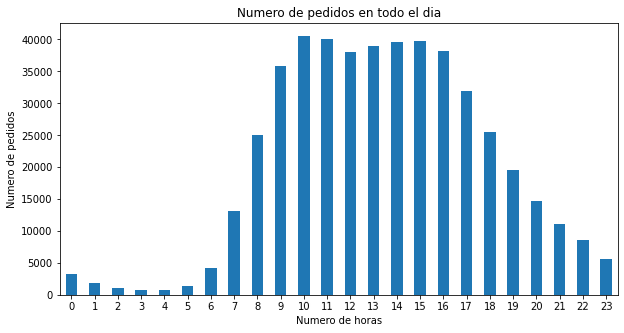

In [37]:
prom=orders.groupby("order_hour_of_day")["order_number"].count().plot(x='order_hour_of_day', y='order_number'
                                                                    ,title="Numero de pedidos en todo el dia"
                                                                    ,xlabel="Numero de horas"
                                                                    ,ylabel="Numero de pedidos"
                                                                    ,kind="bar"
                                                                    ,rot=1
                                                                    ,figsize=(10,5)
                                                                   )
plt.show()

Escribe aquí tus conclusiones
- Observando el grafico podemos determinar que alas 6 empiezan las ordenes y van creciendo que luego se mantienen y apartir de las 4pm las ordenes comienzan a descender


### [A3] ¿Qué día de la semana compran víveres las personas?

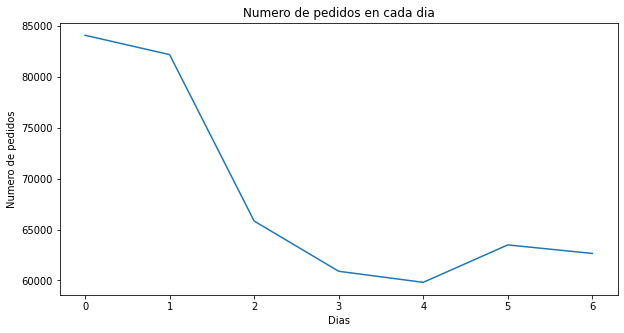

In [38]:

prom=orders.groupby("order_dow")["order_number"].count().plot(x='order_dow', y='order_number'
                                                                    ,title="Numero de pedidos en cada dia"
                                                                    ,xlabel="Dias"
                                                                     ,ylabel="Numero de pedidos"
                                                                    ,rot=1
                                                                    ,figsize=(10,5)
                                                                   )


plt.show()

Escribe aquí tus conclusiones

- Los domingos y los lunes son los dias que las personas realizan mas pedidos luego conforme pasan los dias va disminuyendo hasta el viernes que aumenta un poco los pedidos y luego el sabado baja nuevamente

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

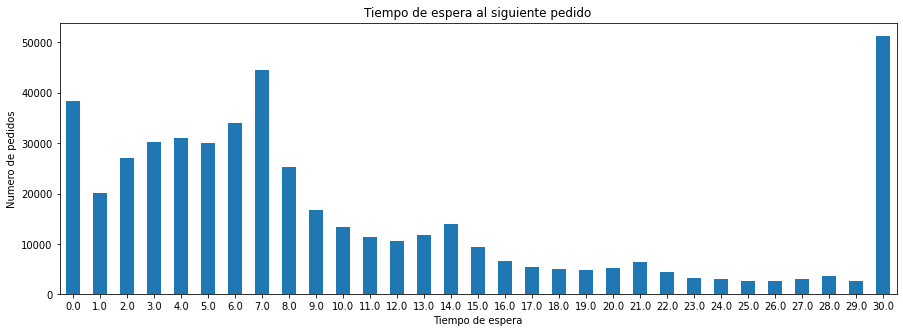

In [39]:
prom=orders.groupby("days_since_prior_order")["user_id"].count().plot(x='days_since_prior_order', y='user_id'
                                                                    ,title="Tiempo de espera al siguiente pedido"
                                                                    ,xlabel="Tiempo de espera"
                                                                    ,ylabel="Numero de pedidos"
                                                                    ,rot=1
                                                                    ,figsize=(15,5)
                                                                    ,kind="bar"
                                                                   )
plt.show()

Escribe aquí tus conclusiones
- La personas tienen una tendencia de hacer pedidos en un tiempo de espera de aproximadamente 1 semana luego no vuelven hacer pedidos luego de 30 dias
- Respecto al minimo se puede ver que el dia 29 muy pocas personas hacen un pedido y luego el dia 30 que podemos entenderlo que a fin de mes la personas empiezan a realizar los pedidos

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
#filtramos el Df pasa sacar los dias miercoles y sabado
filtrado=orders[(orders["order_dow"]==3)|(orders["order_dow"]==6)]

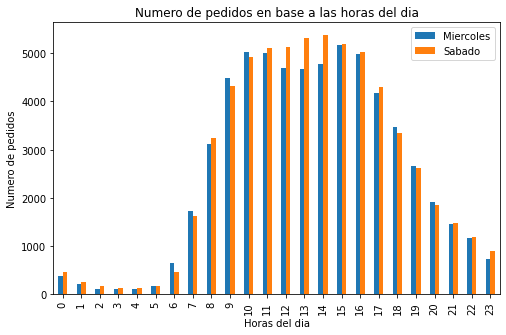

In [41]:
#creamos una tabla dinamica y le apilcamos el plot
filtrado.pivot_table(index="order_hour_of_day"
                       ,columns="order_dow"
                       ,values="order_id"
                       ,aggfunc='count'
                        ).plot(title="Numero de pedidos en base a las horas del dia",kind="bar",xlabel="Horas del dia"
                              ,ylabel="Numero de pedidos"
                              ,figsize=(8,5))
plt.legend(["Miercoles","Sabado"])
plt.show()

Escribe aquí tus conclusiones

- Podemos visualizar que el numero de pedidos entre el miercoles y el sabado a las diferentes horas del dia son casi iguales

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

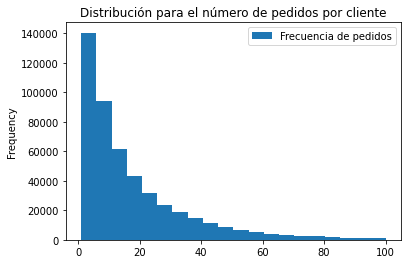

In [42]:
#Creamos un histograma de la columna de numero de pedidos
orders["order_number"].plot(kind="hist",title="Distribución para el número de pedidos por cliente", bins=20)
plt.legend(["Frecuencia de pedidos"])
plt.show() 


Escribe aquí tus conclusiones
- Se ve que la mayor frecuecia de pedidos es para personas nuevas conforme van realizando mas pedidos la cantidad de personas que hacen pedidos va disminuyendo

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
#Agrupamos y contamos los ID de los productos
productos_mas=order_products.groupby(["product_id"])["order_id"].count().reset_index(name='cantidad_pedidos')

In [44]:
#Ordenamos y filtramos los 20 mas pedidos
fil_productos=productos_mas.sort_values(by='cantidad_pedidos', ascending=False).head(20).reset_index(drop=True)

In [45]:
#Conbinamos los los Df para poder mostrar la cantidad y su nombre del producto
conbinados=fil_productos.merge(products[["product_id","product_name"]],on="product_id")
print(conbinados)

    product_id  cantidad_pedidos              product_name
0        24852             66050                    BANANA
1        13176             53297    BAG OF ORGANIC BANANAS
2        21137             37039      ORGANIC STRAWBERRIES
3        21903             33971      ORGANIC BABY SPINACH
4        47209             29773      ORGANIC HASS AVOCADO
5        47766             24689           ORGANIC AVOCADO
6        47626             21495               LARGE LEMON
7        16797             20018              STRAWBERRIES
8        26209             19690                     LIMES
9        27845             19600        ORGANIC WHOLE MILK
10       27966             19197       ORGANIC RASPBERRIES
11       22935             15898      ORGANIC YELLOW ONION
12       24964             15292            ORGANIC GARLIC
13       45007             14584          ORGANIC ZUCCHINI
14       39275             13879       ORGANIC BLUEBERRIES
15       49683             13675            CUCUMBER KIR

Escribe aquí tus conclusiones
- En general podemos ver que la mayor cantidad de productos ordenados son frutas y verduras 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

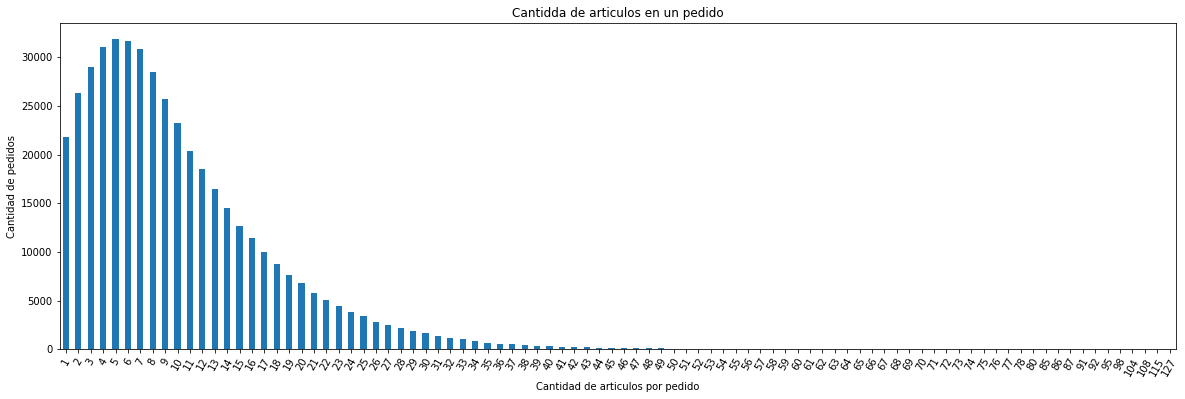

In [60]:
order_products.groupby("order_id")["product_id"].count().value_counts().sort_index().plot(kind="bar",
    title="Cantidda de articulos en un pedido"
    ,xlabel="Cantidad de articulos por pedido"
    ,ylabel="Cantidad de pedidos"
    ,figsize=[20,6]
    ,rot=60                                                                                  
)
plt.show()

Escribe aquí tus conclusiones
- Se puede ver que la mayoria de pedidos radica de 1 a 15 productos por pedido luego va disminuyendo conforme se van teniendo productos por pedido

Escribe aquí tus conclusiones
-

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
#Primero flitramos los productos que vuelven a pedirse
order_products_filtrado=order_products[order_products["reordered"]==1]
#Agrupamos por producto y contamos cuantas veces se ordena cada producto
productos_mas2=order_products_filtrado.groupby(["product_id"])["order_id"].count().reset_index(name='cantidad_pedidos')

In [48]:
#Ordenamos de mayor a menor , seleccionamos los 20 primeros y reseteamos index
fil_productos2=productos_mas2.sort_values(by='cantidad_pedidos', ascending=False).head(20).reset_index(drop=True)

In [49]:
#Conbinamos los Df para obtener el nombre del producto
conbinados2=fil_productos2.merge(products[["product_id","product_name"]],on="product_id")

In [50]:
print(conbinados2)

    product_id  cantidad_pedidos              product_name
0        24852             55763                    BANANA
1        13176             44450    BAG OF ORGANIC BANANAS
2        21137             28639      ORGANIC STRAWBERRIES
3        21903             26233      ORGANIC BABY SPINACH
4        47209             23629      ORGANIC HASS AVOCADO
5        47766             18743           ORGANIC AVOCADO
6        27845             16251        ORGANIC WHOLE MILK
7        47626             15044               LARGE LEMON
8        27966             14748       ORGANIC RASPBERRIES
9        16797             13945              STRAWBERRIES
10       26209             13327                     LIMES
11       22935             11145      ORGANIC YELLOW ONION
12       24964             10411            ORGANIC GARLIC
13       45007             10076          ORGANIC ZUCCHINI
14       49683              9538            CUCUMBER KIRBY
15       28204              8989        ORGANIC FUJI APP

Escribe aquí tus conclusiones
- Podemos ver que los 20 productos mas pedidos que ya han sido pedidos antes son casi iguales a los 20 productos mas pedidos de toda excepto por SODA , LARGE LEMON , OGANIC yORGANIC BLUEBERRIES que varian su posicion pero aun siguen en los 20 productos mas ordenados, tiene sentido ya que si son productos ya pedidos anteriormente la mayoria tiene que estar en los 20 primeros

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
reordered_fil=order_products[order_products["reordered"]==1]

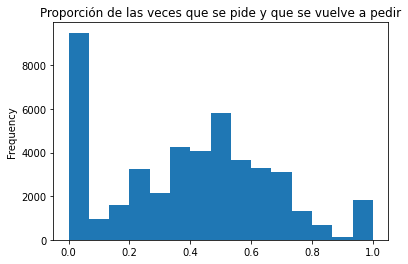

In [52]:
order_products.groupby("product_id")["reordered"].mean().plot(kind="hist",
                                                              title="Proporción de las veces que se pide y que se vuelve a pedir"
                                                             ,bins=15
                                                             
                                                             
                                                             )
plt.show()

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

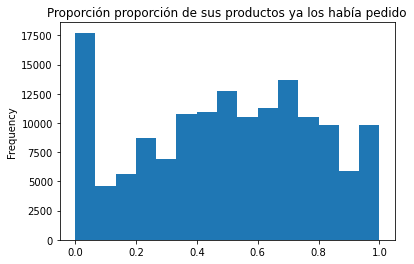

In [53]:
pro_cli=order_products.merge(orders[["order_id","user_id"]],on="order_id")
pro_cli.groupby("user_id")["reordered"].mean().plot(kind="hist",
                                                              title="Proporción proporción de sus productos ya los había pedido"
                                                             ,bins=15
                                                             )
plt.show()

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [54]:
c5_order=order_products[order_products["add_to_cart_order"]==1]

In [55]:
c5_order_fil=c5_order.groupby(["product_id"])["order_id"].count().reset_index(name='cantidad_pedidos')
fil_productos4=c5_order_fil.sort_values(by='cantidad_pedidos', ascending=False).head(20).reset_index(drop=True)
conbinados4=fil_productos4.merge(products[["product_id","product_name"]],on="product_id")

In [56]:
print(conbinados4)

    product_id  cantidad_pedidos                 product_name
0        24852             15562                       BANANA
1        13176             11026       BAG OF ORGANIC BANANAS
2        27845              4363           ORGANIC WHOLE MILK
3        21137              3946         ORGANIC STRAWBERRIES
4        47209              3390         ORGANIC HASS AVOCADO
5        21903              3336         ORGANIC BABY SPINACH
6        47766              3044              ORGANIC AVOCADO
7        19660              2336                 SPRING WATER
8        16797              2308                 STRAWBERRIES
9        27966              2024          ORGANIC RASPBERRIES
10       44632              1914   SPARKLING WATER GRAPEFRUIT
11       49235              1797          ORGANIC HALF & HALF
12       47626              1737                  LARGE LEMON
13         196              1733                         SODA
14       38689              1397     ORGANIC REDUCED FAT MILK
15      

Escribe aquí tus conclusiones
- A simple vista podemos ver que la lista es casi igual a los 20 productos mas pedidos a nivel general 

### Conclusion general del proyecto:

- Con toda la informacion recopilada podemos determinar que los dias que se realizan mas ordenes son los dias domingo y lunes tambien pordiamos considerar martes en las horas de las 6 de la mañlana hasta las 4 de la tarde donde la mayoria de las ordenes son un promedio de 1 a 15 productos por orden, donde la mayoria tiene un tiempo de espera de casi un mes por lo que podemos deducir que es una compra para el mes, sobre que tipos de productos la mayoria predomina frutas y vegetales donde casi la mitad de ordenes totales vuelven a pedir lo mismo